# Analysis of Comcast telecom complaints

## This notebook answer below questions: 
### Q1. Import data into Python environment.
### Q2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.
### Q3. Provide a table with the frequency of complaint types.

### Q4. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
### Q5. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
### Q6. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from above question. Provide insights on:

### Q7. Which state has the maximum complaints
### Q8. Which state has the highest percentage of unresolved complaints
### Q9. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### <font color="green">Q1. Import data into Python environment.</font>

In [2]:
df_comcast_complaints = pd.read_csv("Comcast_telecom_complaints_data_old.csv")

#### view first 5 rows 

In [3]:
df_comcast_complaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_comcast_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
#check again if any column has nulls
df_comcast_complaints.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

#### Convert Date and Time column to new DateTime Column 

In [6]:
df_comcast_complaints["DateTime"] = df_comcast_complaints.Date + " " + df_comcast_complaints.Time
df_comcast_complaints["DateTime"] = pd.to_datetime(df_comcast_complaints.DateTime, format="%d-%m-%y %I:%M:%S %p")
df_comcast_complaints["Date_month_year"] = pd.to_datetime(df_comcast_complaints["Date_month_year"])

---

### <font color="green">Q2. (a) Provide the trend chart for the number of complaints at monthly granularity levels.</font>

---

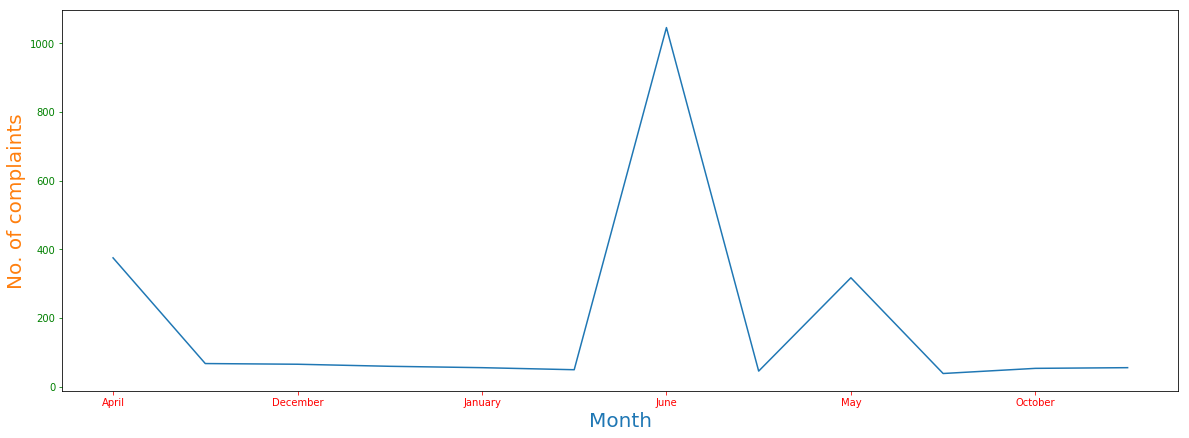

In [7]:
df_comcast_complaints["month"] = pd.to_datetime(df_comcast_complaints["DateTime"]).apply(lambda x: x.strftime('%B'))
ax = df_comcast_complaints.groupby("month").count()["Customer Complaint"].plot(kind = "line", figsize = (20, 7))
ax.set_xlabel("Month",  fontsize=20, color="C0")
ax.set_ylabel("No. of complaints", fontsize=20, color="C1")
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')

---

### <font color="green"> Q2(b). Provide the trend chart for the number of complaints at daily granularity levels.</font>

---

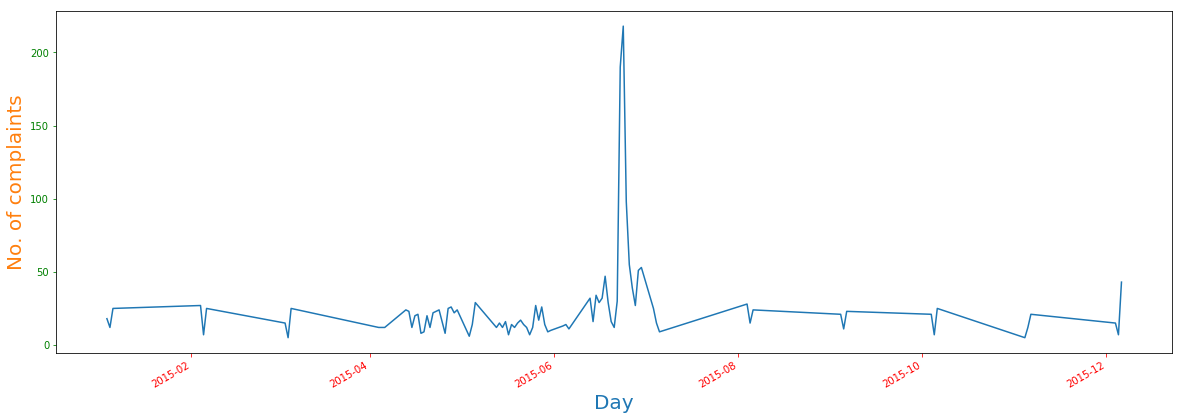

In [8]:
ax = df_comcast_complaints.groupby("Date_month_year").count()["Customer Complaint"].plot(kind = "line", figsize = (20, 7))
ax.set_xlabel("Day",  fontsize=20, color="C0")
ax.set_ylabel("No. of complaints", fontsize=20, color="C1")
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')

#### Inspect Customer Complaint data 

In [9]:
pd.set_option('display.max_rows', 20)
df_comcast_complaints.groupby("Customer Complaint")["Customer Complaint"].size().sort_values(ascending=False)

Customer Complaint
Comcast                                                                 83
Comcast Internet                                                        18
Comcast Data Cap                                                        17
comcast                                                                 13
Comcast Data Caps                                                       11
                                                                        ..
Lack of availability                                                     1
Lack of communication and poor customer service                          1
Lack of consistent service                                               1
Lack of internet speed                                                   1
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!     1
Name: Customer Complaint, Length: 1841, dtype: int64

#### Let's find out most frequent complaints 

In [10]:
# Clean up stop words and punctuations
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
 
stop = set(stopwords.words('english'))
stop.add("comcast") # let's exclude the company name
exclude = set(string.punctuation + "0123456789")
lemma = WordNetLemmatizer()

def cleanup_text(sentence):
    stop_free = " ".join([i for i in sentence.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [11]:
sentence_total = df_comcast_complaints["Customer Complaint"].tolist()
all_sentence_2_words_list_cleaned = [cleanup_text(word).split() for word in sentence_total]
all_words_cleaned = [item for sublist in all_sentence_2_words_list_cleaned for item in sublist]
df_all_words = pd.DataFrame(all_words_cleaned, index = range(len(all_words_cleaned)), columns=["Complaint Type"])
df_all_words.groupby("Complaint Type").size().sort_values(ascending=False)

Complaint Type
internet    517
service     496
billing     283
data        219
speed       187
           ... 
nightly       1
night         1
nh            1
next          1
loses         1
Length: 1344, dtype: int64

### <font color="green">From above we can answer below:</font>
### <font color="green">Q4. Which complaint types are maximum i.e., around internet, network issues, or across any other domains</font>
### <font color="green">A. internet is the highest complained service of Comcast, next is service and the billing, data and speed.<font>

---

### <font color="green"> Q5. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.</font>

---

In [12]:
#View the Status types and frequency
print(df_comcast_complaints.groupby('Status')["Status"].size())


#Create a function to add new column with new Status
def rename_Status(status):
    if status in ('Open','Pending'):
        return 'Open'
    elif status in ('Closed', 'Solved'):
        return 'Closed'
#Apply the function to Status Column to create newcolumn with new status
df_comcast_complaints["OpenClosed"] = df_comcast_complaints["Status"].apply(rename_Status)

#View the new status type
df_comcast_complaints.groupby("OpenClosed").size()

Status
Closed     734
Open       363
Pending    154
Solved     973
Name: Status, dtype: int64


OpenClosed
Closed    1707
Open       517
dtype: int64

---

#### <font color="green">Q6. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from above question (Q5).</font>

---

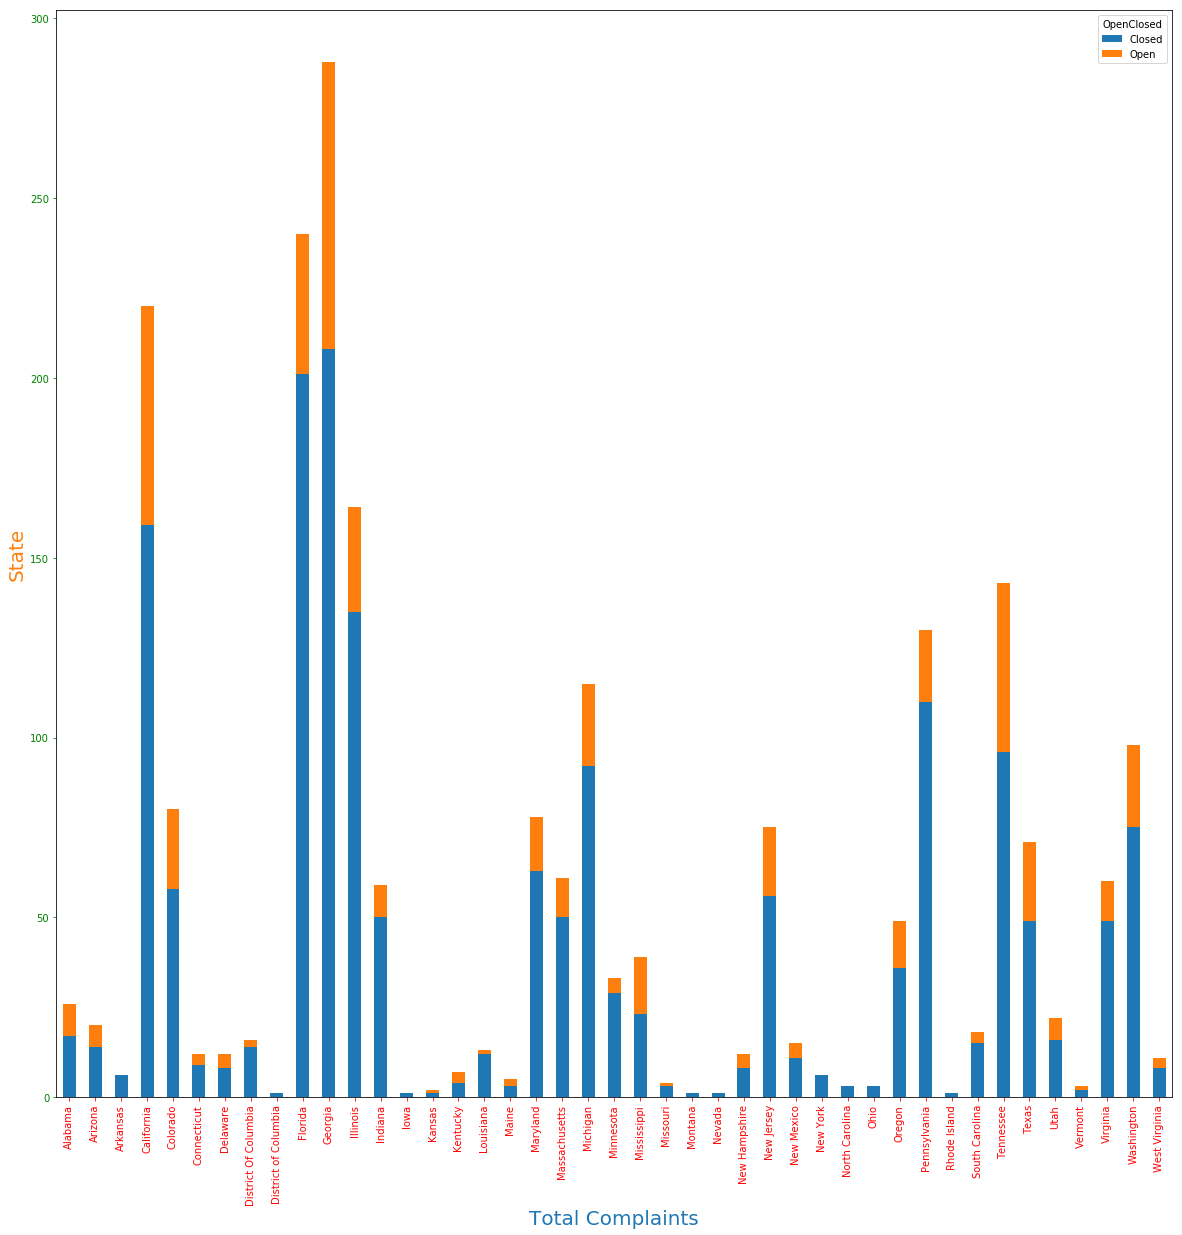

In [13]:
#View the Total complaints by each State using stacked bar chart
ax = df_comcast_complaints.groupby(["State", "OpenClosed"]).size().unstack().plot(kind = "bar",figsize=(20,20), stacked = True)
ax.set_xlabel("Total Complaints",  fontsize=20, color="C0")
ax.set_ylabel("State", fontsize=20, color="C1")
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')

In [14]:
#Adjust district of columbia as you can observe its repeated twice
df_comcast_complaints["State"].replace({"District of Columbia": "District Of Columbia"}, inplace=True)

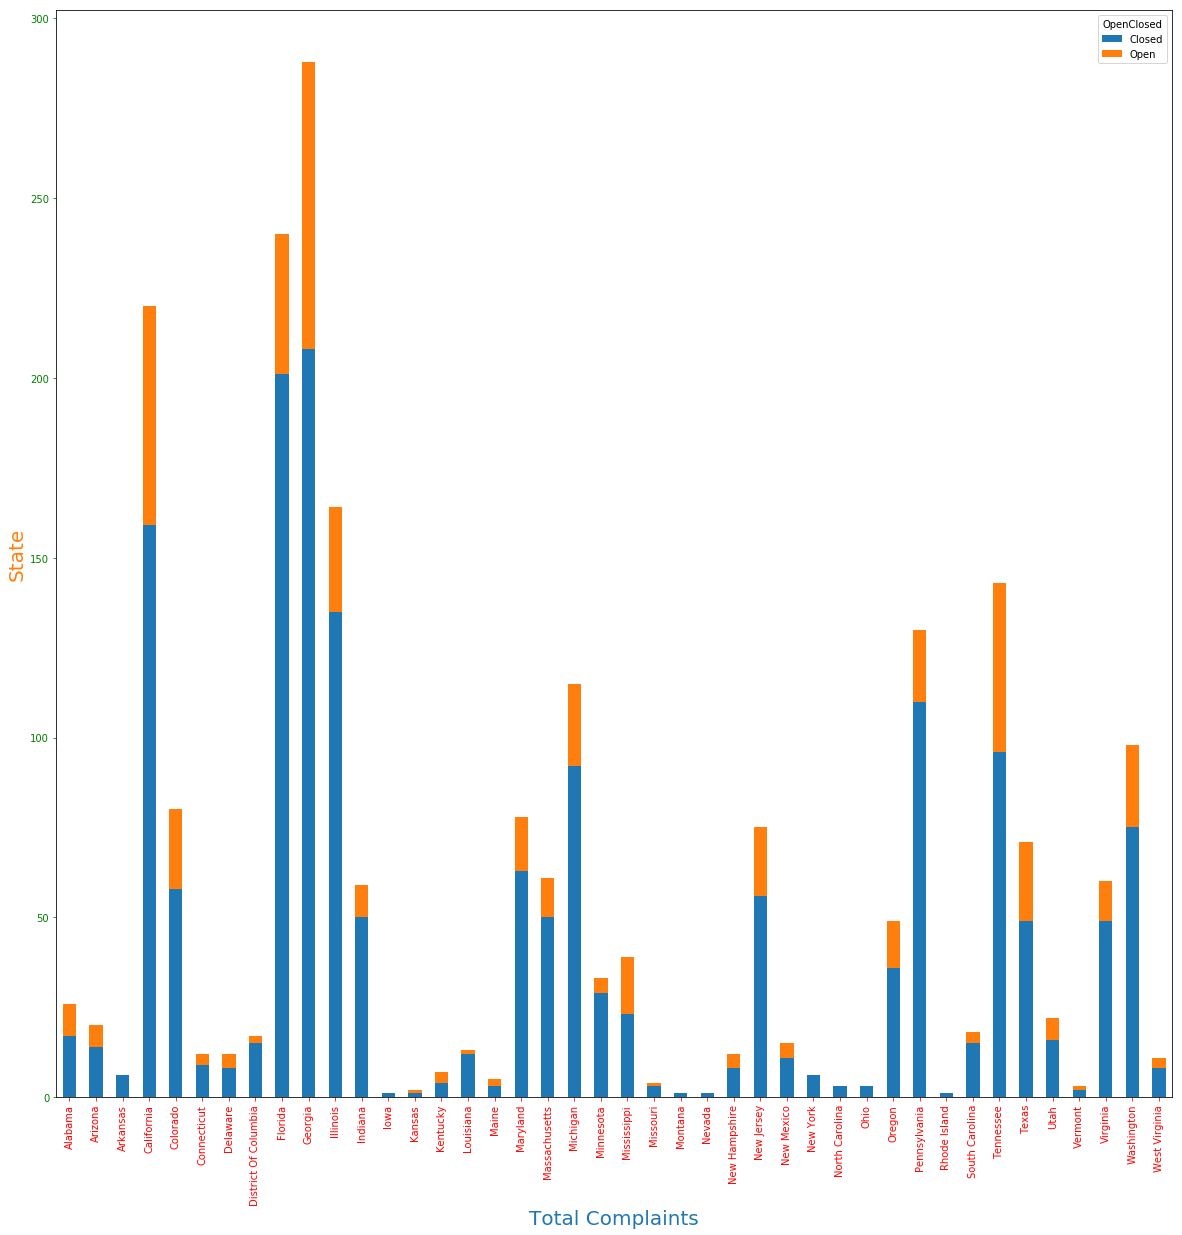

In [15]:
#View the Total complaints by each State using stacked bar chart after adjusting "District of columbia"
ax = df_comcast_complaints.groupby(["State", "OpenClosed"]).size().unstack().plot(kind = "bar",figsize=(20,20), stacked = True)
ax.set_xlabel("Total Complaints",  fontsize=20, color="C0")
ax.set_ylabel("State", fontsize=20, color="C1")
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='green')

In [16]:
#View the Total complaints by each State
pd.set_option('display.max_rows', 50)
df_comcast_complaints.groupby("State").size().sort_values(ascending=False).to_frame('Total Complaints')

,Total Complaints
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


#### <font color='green'>From above we can answer below </font>
#### <font color='green'>Q7: Which state has the maximum complaints</font>
#### <font color='green'>A: Georgia state has the highest compaints</font>

---

#### <font color='green'>Q8. Which state has the highest percentage of unresolved complaints</font>

---

In [17]:

df_comcast_complaints.groupby(["State","OpenClosed"]).size().sort_values(ascending=False).unstack().fillna(0).apply(lambda r: (r/r.sum())*100, axis=1).sort_values("Open",ascending=False)


OpenClosed,Closed,Open
State,,
Kansas,50.000000,50.000000
Kentucky,57.142857,42.857143
Mississippi,58.974359,41.025641
Maine,60.000000,40.000000
Alabama,65.384615,34.615385
Vermont,66.666667,33.333333
New Hampshire,66.666667,33.333333
Delaware,66.666667,33.333333
Tennessee,67.132867,32.867133


In [18]:
pd.set_option('display.max_rows', 5)

#### <font color='green'>Q8/A: As we can see above "Kansas" has the highest number of unresolved complaints with 50 %</font>

---

#### <font color='green'>Q9. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.</font>

---

In [19]:
#let's look at all "Received via" column values
df_comcast_complaints.groupby("Received Via").size().to_frame('Total')

,Total
Received Via,
Customer Care Call,1119
Internet,1105


In [20]:
#Lets filter the dataset again with received via Internet and Customer Care Call
df_internet_customercare_complaints_Received_Via = df_comcast_complaints[np.logical_or(df_comcast_complaints["Received Via"] == "Internet", df_comcast_complaints["Received Via"] == "Customer Care Call")]
df_internet_customercare_complaints_Received_Via

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,month,OpenClosed
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,April,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,August,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23 23:13:30,June,Closed
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,2015-06-24,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,2015-06-24 22:28:33,June,Open


In [21]:
df_internet_customercare_complaints_Received_Via.groupby("OpenClosed").size().to_frame('size').apply(lambda x: 100*x/x.sum())

,size
OpenClosed,
Closed,76.753597
Open,23.246403


#### <font color='green'>From above we can answer below:</font>
#### <font color='green'>Q9/A: Total percentage of complaints resolved till date, which were received through the Internet and customer care calls : <font color='green'> 76.753597 %</font>

# <font color='Orange'>© - July 2020 : Lanka, Nirmal Kumar </font>